PROBLEM STATEMENT

"In the face of climate change, we aim to develop a machine learning model that accurately predicts future temperature changes based on historical climate data, with the overarching goal of enhancing our understanding of climate dynamics and contributing to effective climate change mitigation and adaptation strategies."


In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import  sys
import scipy.sparse as sp

In [ ]:
df=pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns :
  if df[col].dtypes =='object' :
    enc  = LabelEncoder()
    enc.fit(df[col].astype(str))
    df[f'{col}_'] = enc.transform(df[col].astype(str))
    df.drop([col],axis=1, inplace=True)

In [ ]:
df.info()

<Axes: xlabel='AverageTemperature', ylabel='count'>

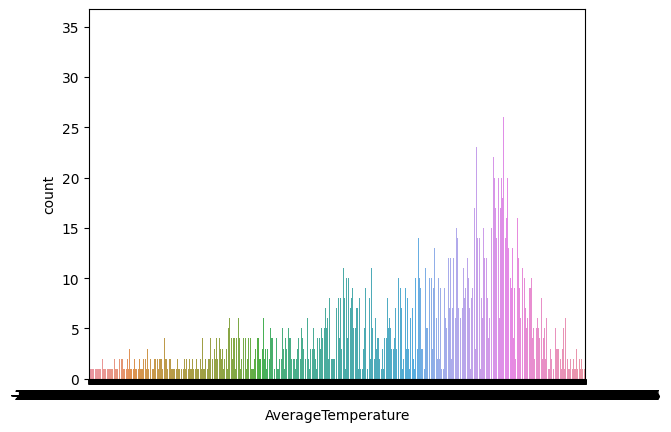

In [13]:
sns.countplot(x='AverageTemperatureUncertainty', data=df)

In [14]:
df.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
dt_                              0
City_                            0
Country_                         0
Latitude_                        0
Longitude_                       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
#no duplicate value found

<Axes: >

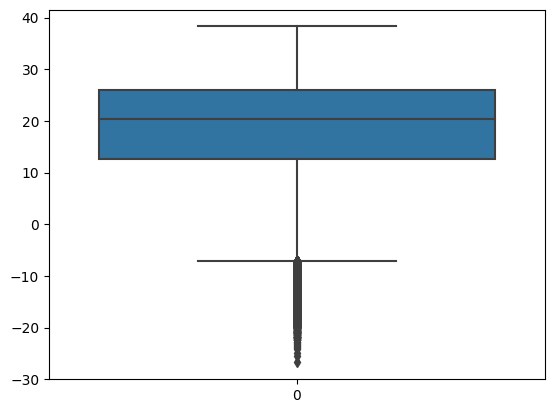

In [17]:
sns.boxplot(df['AverageTemperatureUncertainty'])

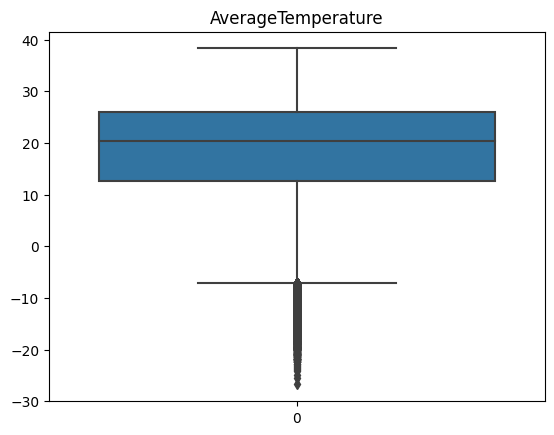

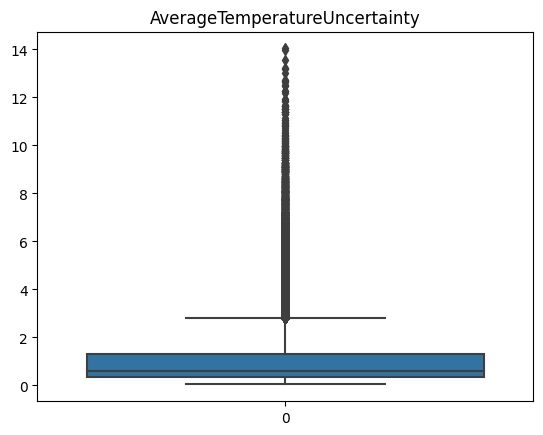

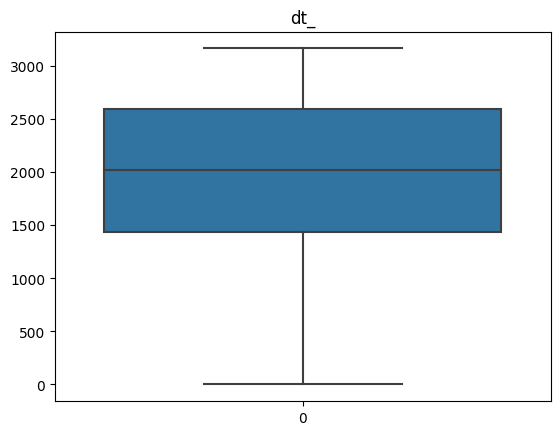

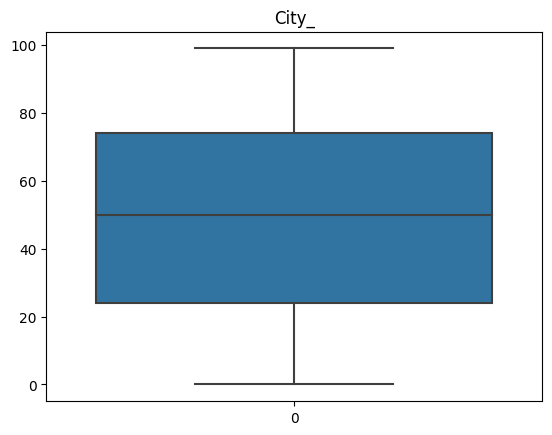

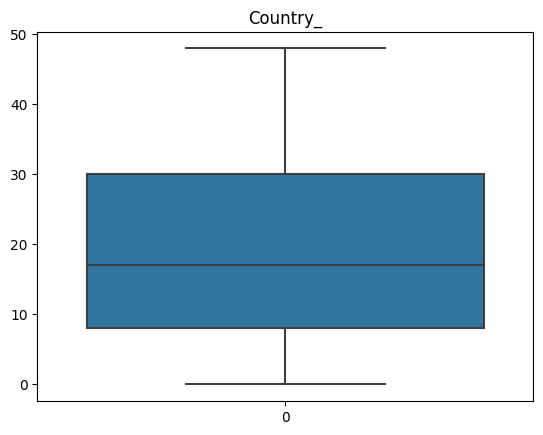

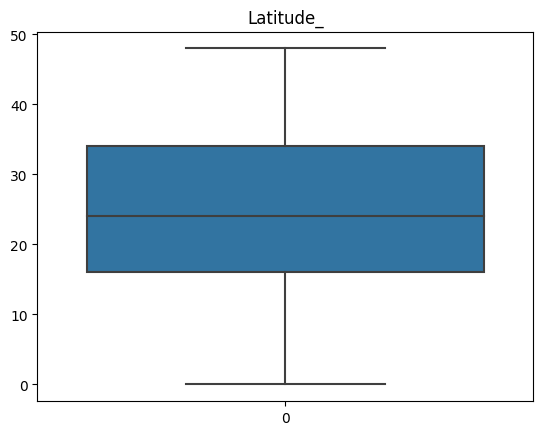

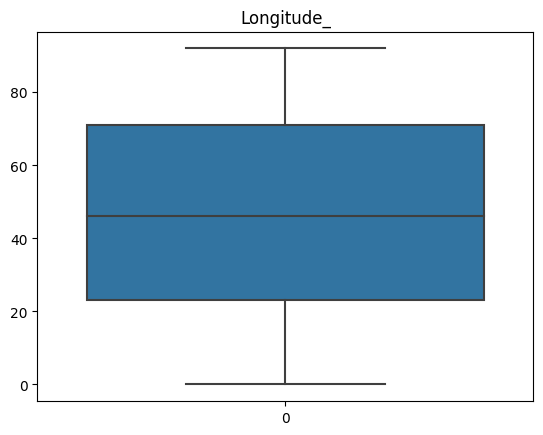

In [18]:
for i in df.columns:
  if type(df[i][0])!=str:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
IQR=[]
IQR.append(df['AverageTemperature'].quantile(0.75)-df['AverageTemperature'].quantile(0.25))
IQR.append(df['AverageTemperatureUncertainty'].quantile(0.75)-df['AverageTemperatureUncertainty'].quantile(0.25))

IQR

In [ ]:
upper=[]
upper.append(df['AverageTemperature'].quantile(0.75)+1.5*(IQR[0]))
upper.append(df['AverageTemperatureUncertainty'].quantile(0.75)+1.5*(IQR[1]))
upper

In [ ]:
lower=[]
lower.append(df['AverageTemperature'].quantile(0.25)-1.5*(IQR[0]))
lower.append(df['AverageTemperatureUncertainty'].quantile(0.25)-1.5*(IQR[1]))

lower

In [ ]:
df.corr

In [23]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns :
  if df[col].dtypes =='object' :
    enc = LabelEncoder()
    enc.fit(df[col].astype(str))
    df[f'{col}_'] = enc.transform(df[col].astype(str))
    df.drop([col],axis=1, inplace=True)

In [ ]:
df.head()

<Axes: >

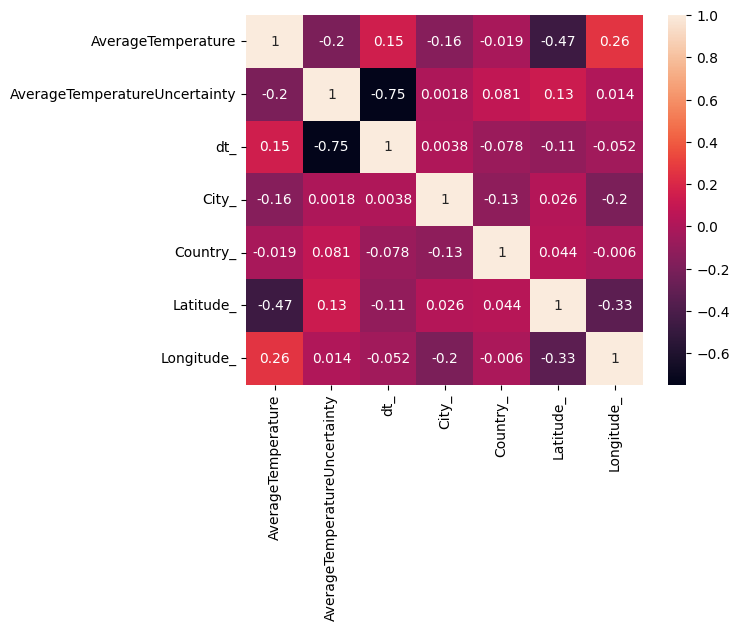

In [25]:
sns.heatmap(df.corr(), annot = True)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
for i in df.columns:
  if df[i].dtype=='0':
    df[i]=le.fit_transform(df[i])

In [29]:
df

,AverageTemperature,AverageTemperatureUncertainty,dt_,City_,Country_,Latitude_,Longitude_
0,26.704,1.435,1190,0,11,39,38
1,27.434,1.362,1191,0,11,39,38
2,28.101,1.612,1192,0,11,39,38
3,26.140,1.387,1193,0,11,39,38
4,25.427,1.200,1194,0,11,39,38
...,...,...,...,...,...,...,...
239171,12.563,1.823,3161,99,8,26,5
239172,18.979,0.807,3162,99,8,26,5
239173,23.522,0.647,3163,99,8,26,5
239174,25.251,1.042,3164,99,8,26,5


In [33]:
y=df['AverageTemperatureUncertainty']
x=df.drop(columns=['AverageTemperatureUncertainty'])

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale=StandardScaler()

In [36]:
names=x.columns

In [37]:
x=scale.fit_transform(x)

In [38]:
x

array([[ 0.85568293, -1.05393867, -1.7133637 , -0.69524533,  1.22070261,
        -0.3260828 ],
       [ 0.9285025 , -1.05259484, -1.7133637 , -0.69524533,  1.22070261,
        -0.3260828 ],
       [ 0.99503764, -1.051251  , -1.7133637 , -0.69524533,  1.22070261,
        -0.3260828 ],
       ...,
       [ 0.5382694 ,  1.59745238,  1.71594039, -0.91631325,  0.12855941,
        -1.53538521],
       [ 0.71074206,  1.59879621,  1.71594039, -0.91631325,  0.12855941,
        -1.53538521],
       [ 0.63862076,  1.60014005,  1.71594039, -0.91631325,  0.12855941,
        -1.53538521]])

In [39]:
y

0         1.435
1         1.362
2         1.612
3         1.387
4         1.200
          ...  
239171    1.823
239172    0.807
239173    0.647
239174    1.042
239175    0.840
Name: AverageTemperatureUncertainty, Length: 228175, dtype: float64

In [ ]:
x=pd.DataFrame(x,columns=names)
x.head()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(182540, 6)
(45635, 6)
(182540,)
(45635,)


In [43]:
#linear regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg_model = LinearRegression()

In [46]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [47]:
training_data_train = lin_reg_model.predict(x_train)

In [48]:
training_data_train = lin_reg_model.predict(x_train)

In [49]:
from sklearn import metrics

In [51]:

accuracy_score = metrics.r2_score(y_train, training_data_train)

In [52]:
print(accuracy_score)

0.5683599540145524


In [53]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
dtree = DecisionTreeRegressor()

# Fit the model with training data
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
y_pred = dtree.predict(x_test)


In [55]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.25046118111098936


pickle

In [56]:
import pickle

In [57]:
pickle.dump(lin_reg_model,open("model.pkl","wb"))